### Importing Requisite Libraries

In [1]:
import nba_api
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import py_ball
from py_ball import league, image, player, boxscore, league_dash, synergy, leaderboard
import seaborn as sns

### Creating Request Header for API Call

In [2]:
HEADERS = {'Connection': 'keep-alive',
           'Host': 'stats.nba.com',
           'Origin': 'http://stats.nba.com',
           'Upgrade-Insecure-Requests': '1',
           'Referer': 'stats.nba.com',
           'x-nba-stats-origin': 'stats',
           'x-nba-stats-token': 'true',
           'Accept-Language': 'en-US,en;q=0.9',
           "X-NewRelic-ID": "VQECWF5UChAHUlNTBwgBVw==",
           'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6)' +\
                         ' AppleWebKit/537.36 (KHTML, like Gecko)' + \
                         ' Chrome/81.0.4044.129 Safari/537.36'}

### Pulling "Touches" Data into DataFrame

In [3]:
touches = league_dash.LeagueDash(headers = HEADERS, endpoint = 'leaguedashptstats', season = "2022-23", player_or_team = "Player", pt_measure_type = "Possessions", date_to = "11/29/2022")
touches_data = touches.data["LeagueDashPtStats"]
touches_df = pd.DataFrame(touches_data)
touches_df.sort_values("TIME_OF_POSS", ascending = False)

# Isolating Necessary Columns
touches_df = touches_df[["PLAYER_NAME", "TIME_OF_POSS", "TEAM_ABBREVIATION"]]
touches_df = touches_df[touches_df["TIME_OF_POSS"] <= 5]
touches_df

,PLAYER_NAME,TIME_OF_POSS,TEAM_ABBREVIATION
0,A.J. Lawson,0.0,DAL
1,AJ Green,0.4,MIL
2,AJ Griffin,0.6,ATL
3,Aaron Gordon,1.8,DEN
4,Aaron Holiday,1.5,ATL
...,...,...,...
469,Yuta Watanabe,0.6,BKN
470,Zach Collins,0.9,SAS
471,Zach LaVine,3.7,CHI
472,Zeke Nnaji,0.3,DEN


### Importing "Assists" Data Scraped from Basketball Reference into DataFrame

In [4]:
ast_df = pd.read_csv("//Users//yashwant//Downloads//22-23AST_BBallRef.csv")
del ast_df["Rk"]
ast_df

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
0,Tyrese Haliburton,PG,22.0,IND,20.0,675.0,23.7,0.595,0.463,0.195,...,NaN,2.3,0.7,3.0,0.214,NaN,6.5,0.7,7.2,1.6
1,Luka Dončić,PG,23.0,DAL,19.0,710.0,31.4,0.605,0.338,0.493,...,NaN,2.7,1.2,3.9,0.262,NaN,8.2,2.8,10.9,2.3
2,Nikola Jokić,C,27.0,DEN,17.0,544.0,31.2,0.700,0.147,0.476,...,NaN,2.8,0.7,3.5,0.304,NaN,7.7,3.5,11.3,1.8
3,Trae Young,PG,24.0,ATL,20.0,708.0,22.0,0.543,0.332,0.401,...,NaN,1.4,0.5,1.8,0.124,NaN,5.7,-2.0,3.7,1.0
4,Russell Westbrook,PG,34.0,LAL,18.0,508.0,14.7,0.498,0.311,0.299,...,NaN,-0.5,0.6,0.1,0.014,NaN,-0.6,-0.5,-1.1,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Jalen Duren,C,19.0,DET,20.0,442.0,14.3,0.579,0.010,0.406,...,NaN,0.5,0.3,0.8,0.084,NaN,-1.8,-1.2,-3.0,-0.1
200,Chris Boucher,PF,30.0,TOR,16.0,379.0,19.0,0.569,0.340,0.429,...,NaN,0.8,0.5,1.3,0.162,NaN,0.8,-0.9,-0.1,0.2
201,Isaac Okoro,SG,22.0,CLE,21.0,405.0,4.7,0.492,0.444,0.389,...,NaN,-0.2,0.5,0.3,0.041,NaN,-5.8,1.1,-4.7,-0.3
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.1,0.6,0.7,0.059,NaN,-2.0,-0.3,-2.3,0.0


### Merging the 2 DataFrames into One Large DataFrame, Merging by Name

In [5]:
connectors_df = pd.merge(touches_df, ast_df, left_on = "PLAYER_NAME", right_on = "Player")
connectors_df.sort_values("AST", ascending = False)

,PLAYER_NAME,TIME_OF_POSS,TEAM_ABBREVIATION,Player,Pos,Age,Tm,G,MP,PER,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
113,Marcus Smart,4.1,BOS,Marcus Smart,PG,28.0,BOS,19.0,613.0,13.6,...,NaN,1.0,0.5,1.5,0.120,NaN,-0.1,-0.3,-0.4,0.2
42,Draymond Green,2.2,GSW,Draymond Green,PF,32.0,GSW,20.0,613.0,13.9,...,NaN,1.0,0.7,1.7,0.130,NaN,-0.7,2.1,1.4,0.5
112,Malik Monk,1.8,SAC,Malik Monk,SG,24.0,SAC,19.0,429.0,18.4,...,NaN,0.8,0.2,1.1,0.119,NaN,2.9,-1.4,1.5,0.4
10,Ben Simmons,3.5,BKN,Ben Simmons,PG,26.0,BRK,17.0,477.0,14.9,...,NaN,0.6,0.7,1.3,0.126,NaN,-1.5,2.2,0.7,0.3
77,Jimmy Butler,4.6,MIA,Jimmy Butler,SF,33.0,MIA,13.0,464.0,24.0,...,NaN,1.7,0.7,2.3,0.243,NaN,4.8,1.7,6.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Rudy Gobert,1.1,MIN,Rudy Gobert,C,30.0,MIN,19.0,605.0,19.7,...,NaN,1.6,0.8,2.4,0.194,NaN,0.7,-0.5,0.2,0.3
60,Jabari Smith Jr.,1.4,HOU,Jabari Smith Jr.,PF,19.0,HOU,19.0,570.0,9.4,...,NaN,0.1,0.4,0.4,0.036,NaN,-2.7,-1.5,-4.2,-0.3
64,Jalen Duren,0.7,DET,Jalen Duren,C,19.0,DET,20.0,442.0,14.3,...,NaN,0.5,0.3,0.8,0.084,NaN,-1.8,-1.2,-3.0,-0.1
55,Isaac Okoro,0.7,CLE,Isaac Okoro,SG,22.0,CLE,21.0,405.0,4.7,...,NaN,-0.2,0.5,0.3,0.041,NaN,-5.8,1.1,-4.7,-0.3


### Using Seaborn, Matplotlib, NumPy to Plot Assist Percentage vs. Time of Possession for Players

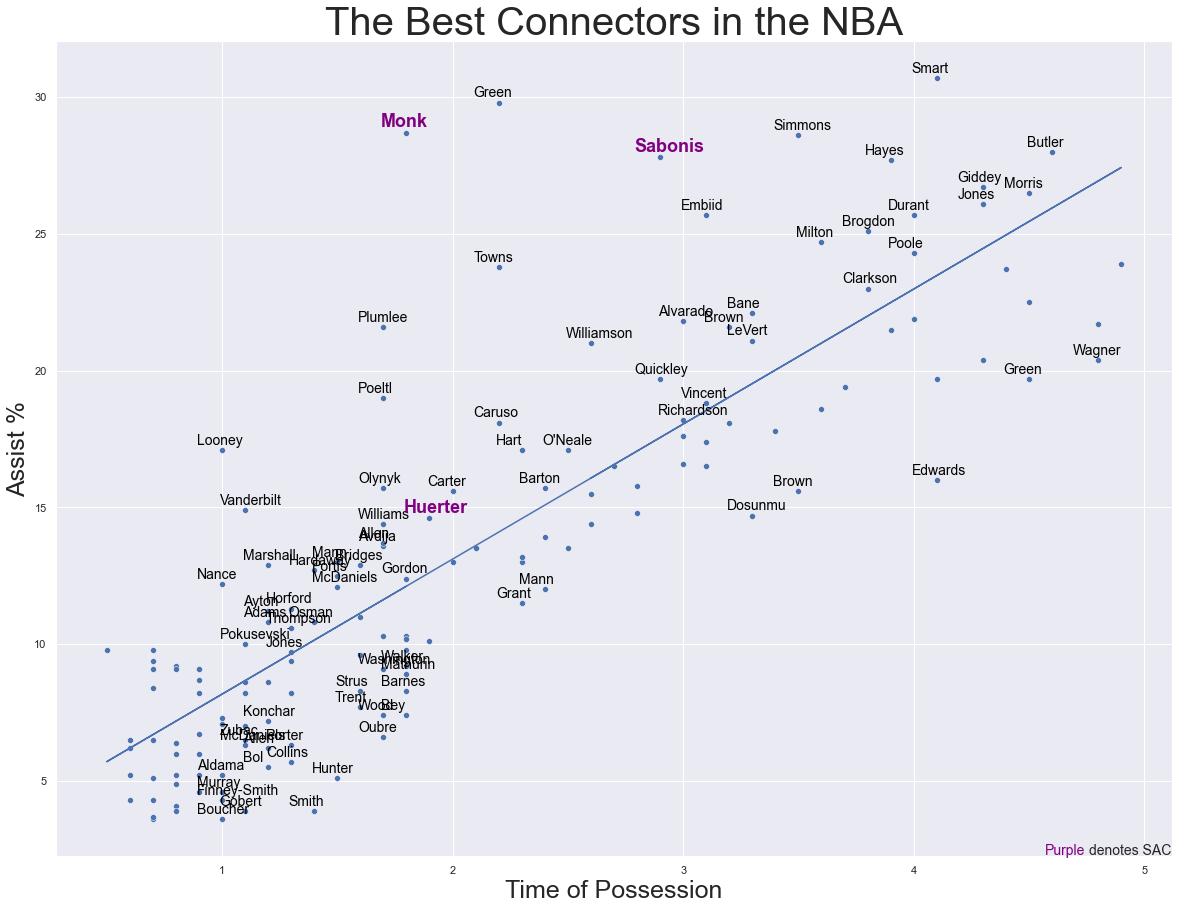

In [6]:
# Plotting scatterplot
plt.figure(figsize=(20,15))
sns.set_theme()
sns.scatterplot(data=connectors_df,x="TIME_OF_POSS",y="AST")

# Plotting line of best fit
x = connectors_df["TIME_OF_POSS"]
y = connectors_df["AST"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

# Highlighting Kings players
for i, player in enumerate(connectors_df["Player"]):
     if(connectors_df["TIME_OF_POSS"][i] >= 1 and connectors_df["TIME_OF_POSS"][i] <= 5 and (connectors_df["AST"][i] > 1 * (m*connectors_df["TIME_OF_POSS"][i] + b) or connectors_df["AST"][i] < 0.8 * (m*connectors_df["TIME_OF_POSS"][i] + b))):
        c = "black"
        fs=14
        weight = "normal"
        if(connectors_df["TEAM_ABBREVIATION"][i] == "SAC" and connectors_df["AST"][i] > 1 * (m*connectors_df["TIME_OF_POSS"][i] + b)):
            c = "purple"
            weight = "bold"
            fs = 18
        plt.text(connectors_df.TIME_OF_POSS[i] - 0.11, connectors_df["AST"][i] + 0.2, player.split()[1], color = c, fontsize=fs, weight = weight)   

# Labels
plt.xlabel('Time of Possession', fontsize = 25)
plt.ylabel('Assist %', fontsize = 25)
plt.title("The Best Connectors in the NBA", fontsize = 40)

plt.text(4.57, 2.3, "Purple", color = "purple", fontsize = 14)
plt.text(4.76, 2.3, "denotes SAC", fontsize = 14)

plt.show()